***Task:*** Can you accurately predict insurance costs?


Data source: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Loading the dataset:

df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [3]:
# Checking some data statistics:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
len(df)

1338

In [7]:
# Checking for null & duplicate values:

print(df.isnull().sum())

print('\n',df.duplicated().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 1


In [8]:
# Removing duplicates:

df.drop_duplicates(inplace = True)


print('\n',df.duplicated().sum())


 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

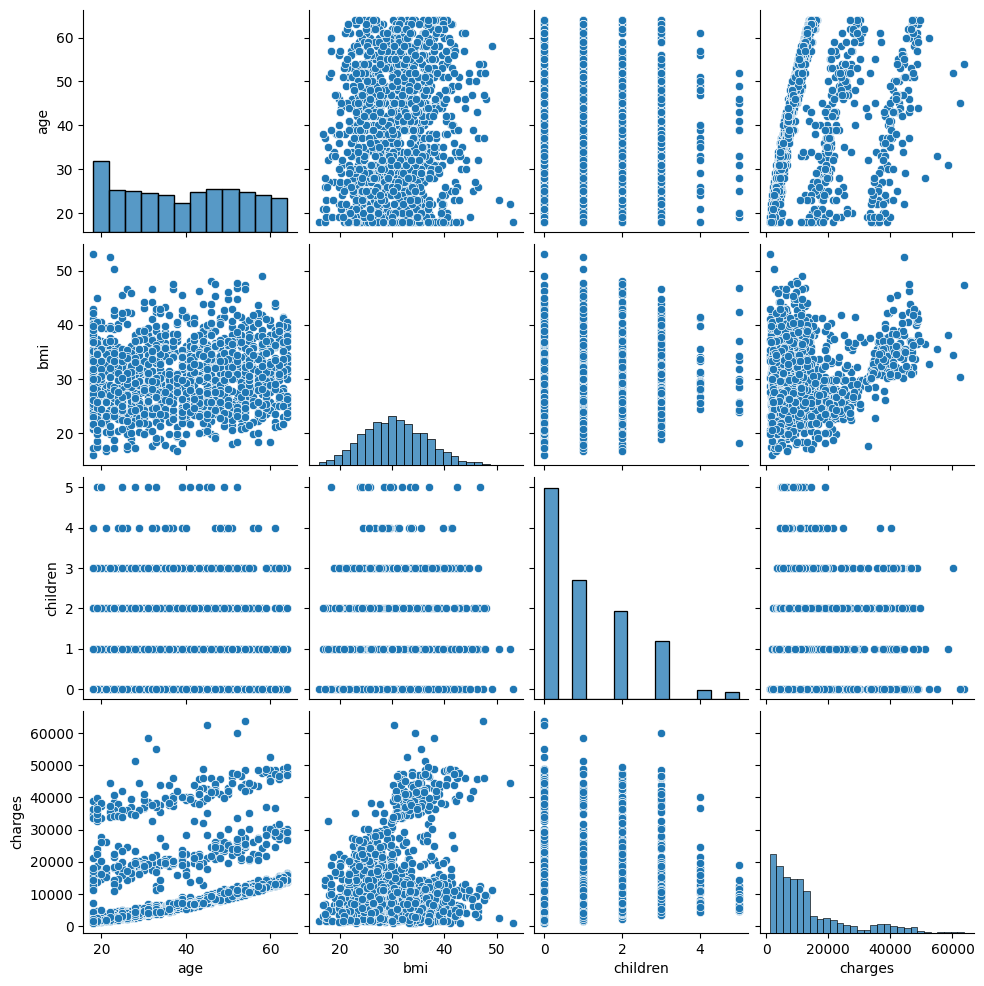

In [9]:
# Plotting to see relationship between features:

sns.pairplot(df)

From the graph above it isn't clearly evident what features share colineraity or any other assumption which we can take into consideration. One clue we can get is, as age increase so does the charge of your insurance, which sounds natural as this group of customers is more prone to accidents. At the same time, we should also not forget that insurance premium goes down as you accumulate a lot of bonus and discounts given no claims.

In [10]:
# One hot encoding to convert from category to numerical:

cats = ['sex', 'smoker', 'region']

df = pd.get_dummies(data = df, columns = cats, drop_first = True, dtype=int)

In [11]:
# Splitting data for train and test:

X = df.drop("charges", axis = 1) # Selecting features.

y = df["charges"] # Selecting target variable.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
len(X) == len(y)

True

Since charges of insurance are on a different scale as compared to BMI and newly ceated one hot encoded variables, it would be sensible to bring entire dataset under one nonimal range. We will use standard scaler for this.

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # We only fit and transform to training data.

X_test = scaler.transform(X_test) # We only transform test data, but we don't fit to prevent data leakage.


In [14]:
# Creating an instance of Linear Regression:

reg_model = LinearRegression()

reg_model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Reshaping the test data:

# y_test = y_test.values.reshape(-1, 1)

In [16]:
reg_model.predict(X_test)

array([10652.65358937,  2843.95702623,  3695.80399036, 13803.72317985,
        8773.22168818,   280.70631919, 15342.16135657,  6139.4204633 ,
       11211.94703897,  5920.08367738,  9853.41729831, 10981.20344897,
       14455.20423897, 12708.65148908,  9230.58494267, 36889.07905679,
        8773.86849708, 12215.7024506 , 15151.83290294, 13847.45974896,
         314.12792385, 28637.28725698, 32925.91317622, 14020.70085283,
       26748.41658293, 24867.41065202, 11244.09264899, 13027.9476191 ,
        6094.94929333,  6956.2727301 ,  5962.37911169, 10011.23458005,
        2864.03940109,  3478.9675148 ,    49.82770871,  5805.18189114,
        9220.70294381, 12712.94868724, 14204.12326909,   197.89887976,
       10626.586214  , 33042.98561136,  8645.3379078 ,  9955.21153589,
       31657.63946647,  6402.16805513, 27494.24206234,  3472.50146707,
       33261.09817153,  2217.11746217, -1095.59459212,  2791.60206696,
        6807.88755799,  8940.17344392,  3771.61355777, 14336.09726559,
      

In [17]:
# Checking model parameters:

y_pred = reg_model.predict(X_test)

print("Weights:" , reg_model.coef_)

print("Intercept:" , reg_model.intercept_)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("R2 score:" , r2_score(y_test, y_pred))

Weights: [3490.24550705 2172.17885906  531.79821552  -13.31228341 9674.90009332
 -148.2290873  -204.92425527 -289.7679525 ]
Intercept: 13539.673966351873
RMSE: 5927.275205663877
R2 score: 0.7492975570671867


The scores obtained above don't seem to be good, they aren't bad either, but we don't have a gold standard to compare them.  However, we can use regularization to improvide scores by adding penalty terms. The whole idea of Lasso (l1), Ridge(l2) and Elastic Net is to assume a new line that is of a less fit as compared to original fit. This introduces some bias using the parameter alpha. The line formed using regularization is then compared to original line and the one with less RMSE is selected. This is done until a good slope value is found using K fold mechanism. Where K = number of iterations required to find an optimal alpha value. We will use LassoCV instead to find alpha value, alpha in SKLearn is referred to as eps or epsilon. Lasso can also gives weights a value of 0, which helps in determining which feautures we should completely ignore. Rigde on the other hand won't make it completely 0, but still consider their importance by assigning them a value close to 0.

In [18]:
# Starting with L1 - Lasso:

lasso_cv = LassoCV(eps=0.1, n_alphas=100, cv=10)

lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, eps=0.1)

In [19]:
# Best alpha value returned:

lasso_cv.alpha_

963.7472752845841

In [20]:
# Prediction using Lasso:

lasso_cv_pred = lasso_cv.predict(X_test)

In [21]:
# Lasso Metrics:

print("Weights:" , lasso_cv.coef_)

print("Intercept:" , lasso_cv.intercept_)

print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_cv_pred)))

print("R2 score:" , r2_score(y_test, lasso_cv_pred))

Weights: [2639.05158769 1268.15641985    0.            0.         8704.89071343
   -0.            0.           -0.        ]
Intercept: 13539.673966351873
RMSE: 6268.061092407863
R2 score: 0.7196407929359674


We see there is a slight improvement in R2 score, we can conclude from L1's metrics that it is suggesting only to consider age, bmi and sex_male features to make a decision and rest could be ignored.

In [22]:
# Using Ridge:

ridge_model = Ridge(alpha=10)

ridge_model.fit(X_train,y_train)



Ridge(alpha=10)

In [23]:
# Ridge Predictions:

ridge_pred = ridge_model.predict(X_test)

In [24]:
# Ridge Metrics:

print("Weights:" , ridge_model.coef_)

print("Intercept:" , ridge_model.intercept_)

print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))

print("R2 score:" , r2_score(y_test, ridge_pred))

Weights: [ 3.45484162e+03  2.14726368e+03  5.29539355e+02 -3.48812519e+00
  9.57019186e+03 -1.45830923e+02 -1.85643339e+02 -2.84107723e+02]
Intercept: 13539.673966351873
RMSE: 5942.979805478559
R2 score: 0.7479673008271273


As explained earlier, Ridge is suggesting to use all features as compared to Lasso. Here, RMSE has gone down a bit.

Next ideal step is to convert from linear to Polynomial and  experiment with different degrees of weights.

In [25]:
# Creating a converter object:

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
# Transforming data which squares every term and also return interaction terms:

poly_features = polynomial_converter.fit_transform(X)

In [27]:
# Again train / test split:

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [28]:
# Testing new features using linear regression:

poly_model = LinearRegression(fit_intercept=True)

poly_model.fit(X_train,y_train)

LinearRegression()

In [29]:
# Predicting output:

poly_pred = poly_model.predict(X_test)

In [30]:
# Polynomial Mertices:

print("Weights:" , poly_model.coef_)

print("Intercept:" , poly_model.intercept_)

print("RMSE:", np.sqrt(mean_squared_error(y_test, poly_pred)))

print("R2 score:" , r2_score(y_test, poly_pred))

Weights: [-1.14223707e+02  7.14273286e+02  1.12023869e+03 -6.75629114e+01
 -1.08671315e+04 -8.90004245e+02 -5.12085344e+02 -1.37790997e+03
  4.00753156e+00 -7.27363988e-01  1.24471820e+00  2.28157012e+01
 -9.32090183e+00  5.00431123e+01  1.09065070e+02  7.05921969e+01
 -9.72673797e+00  3.27186429e+00 -4.60029734e+01  1.53401500e+03
 -3.53345944e+01 -1.29499234e+02 -2.63246232e+01 -8.59837411e+01
 -4.11628323e+02 -1.58851677e+01 -4.87127099e+00 -2.15776840e+02
 -4.85463972e+02 -6.75629114e+01 -5.97004919e+02  6.20313807e+02
  1.24661468e+03 -3.34882461e+01 -1.08671315e+04 -1.69318178e+03
 -2.42220908e+03  2.20860390e+02 -8.90004245e+02  0.00000000e+00
  0.00000000e+00 -5.12085344e+02  0.00000000e+00 -1.37790997e+03]
Intercept: -5560.418108506279
RMSE: 5044.696761726386
R2 score: 0.8183988839791517


In [31]:
# Repeating regularization using Lasso:

lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=10)

lasso_cv.fit(X_train, y_train)

lasso_cv_pred = lasso_cv.predict(X_test)

In [32]:
# Lasso Metrics:

print("Weights:" , lasso_cv.coef_)

print("Intercept:" , lasso_cv.intercept_)

print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_cv_pred)))

print("R2 score:" , r2_score(y_test, lasso_cv_pred))

Weights: [  0.           0.           0.           0.           0.
  -0.           0.          -0.           2.2388605    1.71035617
   0.           0.          92.73800464  -0.           0.
  -0.           2.40351469   0.           0.         434.07502933
  -0.           0.          -0.           0.           0.
   0.           0.           0.          -0.           0.
   0.          -0.           0.          -0.           0.
   0.           0.           0.          -0.           0.
   0.           0.           0.          -0.        ]
Intercept: 1492.939759327066
RMSE: 6296.5393762688755
R2 score: 0.717087439821041


In [33]:
# Calculating errors while trying out different degrees (Ref: Jose)

# TRAINING ERROR PER DEGREE
train_rmse_errors = []

# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

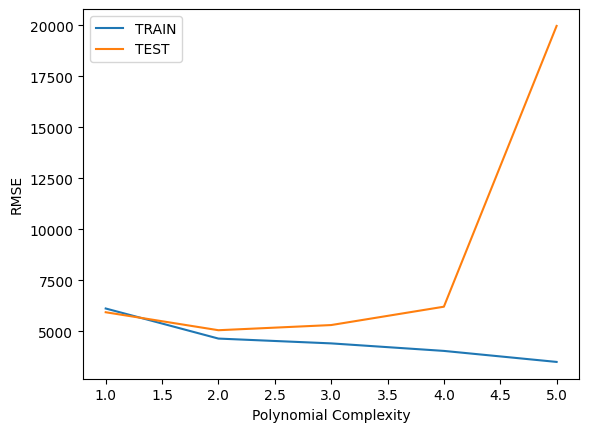

In [34]:
# Plotting above calculated errors:

plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

It could be concluded that quadratic function suits best to this data and following features should only to be taken into account: age, bmi and sex_male.